In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np




In [6]:
file_path = "Global_Tech_Gadget_Consumption.csv"
df = pd.read_csv(file_path)

print("Dataset Information:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())

# Handling missing values
df = df.dropna()



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country                                   110 non-null    object 
 1   Year                                      110 non-null    int64  
 2   Smartphone Sales (Millions)               110 non-null    float64
 3   Laptop Shipments (Millions)               110 non-null    float64
 4   Gaming Console Adoption (%)               110 non-null    float64
 5   Smartwatch Penetration (%)                110 non-null    float64
 6   Average Consumer Spending on Gadgets ($)  110 non-null    float64
 7   E-Waste Generated (Metric Tons)           110 non-null    float64
 8   5G Penetration Rate (%)                   110 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 7.9+ KB
None

Descriptive Statistics:
  

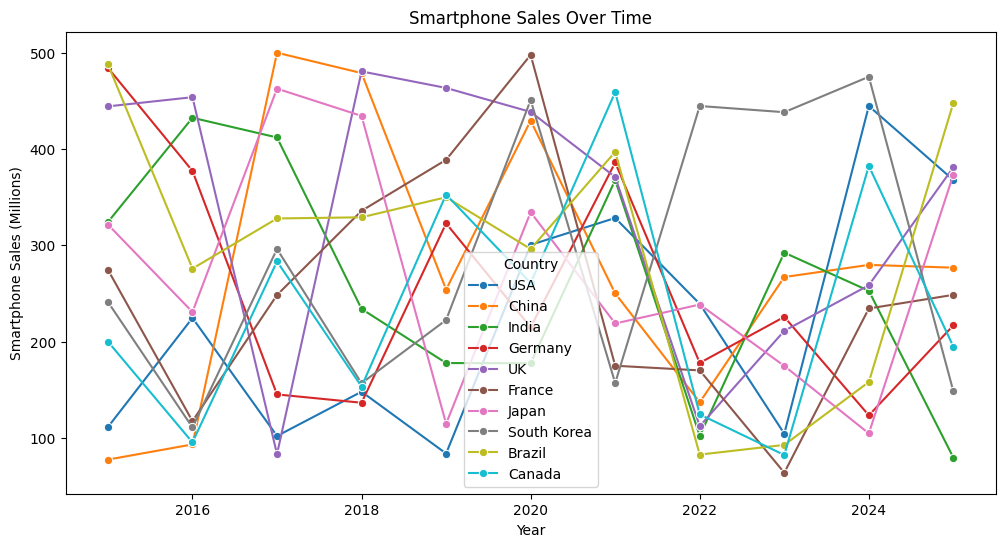

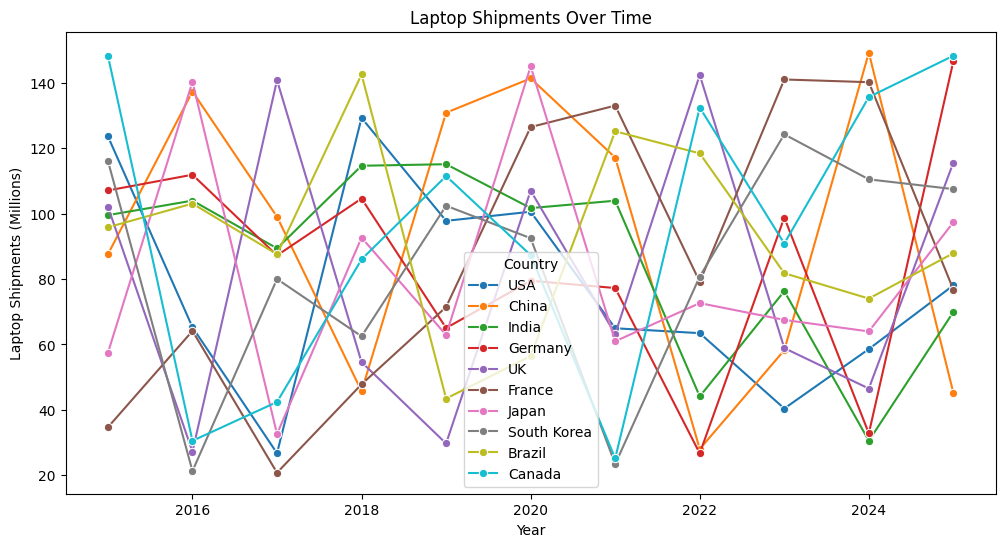

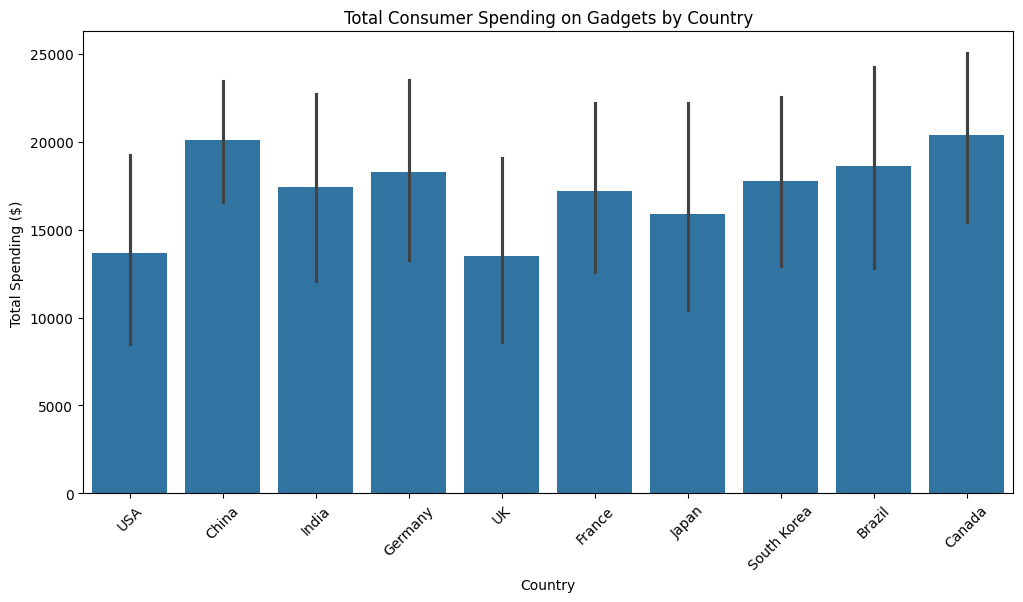

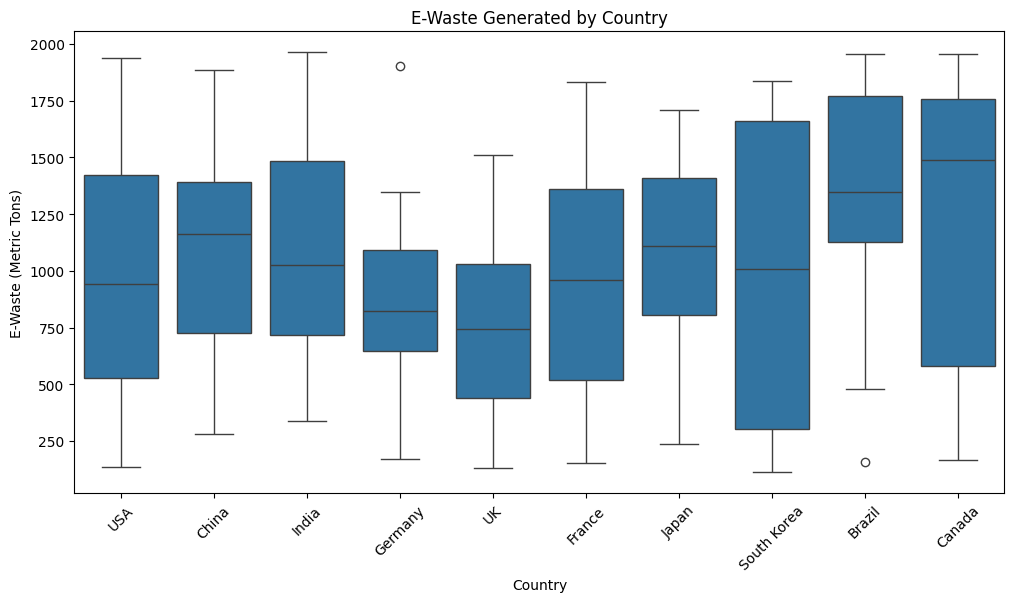

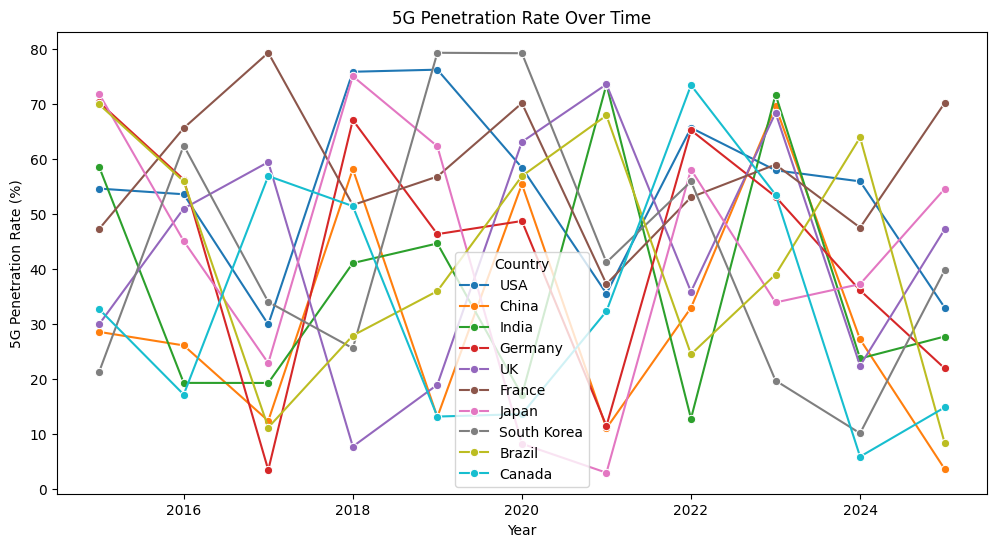

In [7]:
# Visualization - Smartphone Sales Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Smartphone Sales (Millions)', hue='Country', marker='o')
plt.title('Smartphone Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Smartphone Sales (Millions)')
plt.legend(title='Country')
plt.show()

# Visualization - Laptop Shipments Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Laptop Shipments (Millions)', hue='Country', marker='o')
plt.title('Laptop Shipments Over Time')
plt.xlabel('Year')
plt.ylabel('Laptop Shipments (Millions)')
plt.legend(title='Country')
plt.show()

# Visualization - Average Consumer Spending on Gadgets
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Country', y='Average Consumer Spending on Gadgets ($)', estimator=sum)
plt.xticks(rotation=45)
plt.title('Total Consumer Spending on Gadgets by Country')
plt.xlabel('Country')
plt.ylabel('Total Spending ($)')
plt.show()

# Visualization - E-Waste Generated by Country
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Country', y='E-Waste Generated (Metric Tons)')
plt.xticks(rotation=45)
plt.title('E-Waste Generated by Country')
plt.xlabel('Country')
plt.ylabel('E-Waste (Metric Tons)')
plt.show()

# Visualization - 5G Penetration Rate Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='5G Penetration Rate (%)', hue='Country', marker='o')
plt.title('5G Penetration Rate Over Time')
plt.xlabel('Year')
plt.ylabel('5G Penetration Rate (%)')
plt.legend(title='Country')
plt.show()


In [8]:
top_countries = df['Country'].value_counts().head(10).index
df_top = df[df['Country'].isin(top_countries)]

# Define function for predictive modeling
def predict_future_trends(df, feature):
    predictions = {}
    future_years = np.array(range(df['Year'].max() + 1, df['Year'].max() + 6)).reshape(-1, 1)
    
    for country in df['Country'].unique():
        country_df = df[df['Country'] == country]
        if len(country_df) < 3:
            continue  # Skip countries with insufficient data
        
        X = country_df[['Year']]
        y = country_df[feature]
        
        model = LinearRegression()
        model.fit(X, y)
        future_preds = model.predict(future_years)
        predictions[country] = future_preds
    
    return predictions, future_years.flatten()

smartphone_preds, future_years = predict_future_trends(df_top, 'Smartphone Sales (Millions)')
laptop_preds, _ = predict_future_trends(df_top, 'Laptop Shipments (Millions)')
fiveg_preds, _ = predict_future_trends(df_top, '5G Penetration Rate (%)')



/Users/mohamedseifeldin/Library/Python/3.12/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/mohamedseifeldin/Library/Python/3.12/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/mohamedseifeldin/Library/Python/3.12/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/mohamedseifeldin/Library/Python/3.12/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/mohamedseifeldin/Library/Python/3.12/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: 

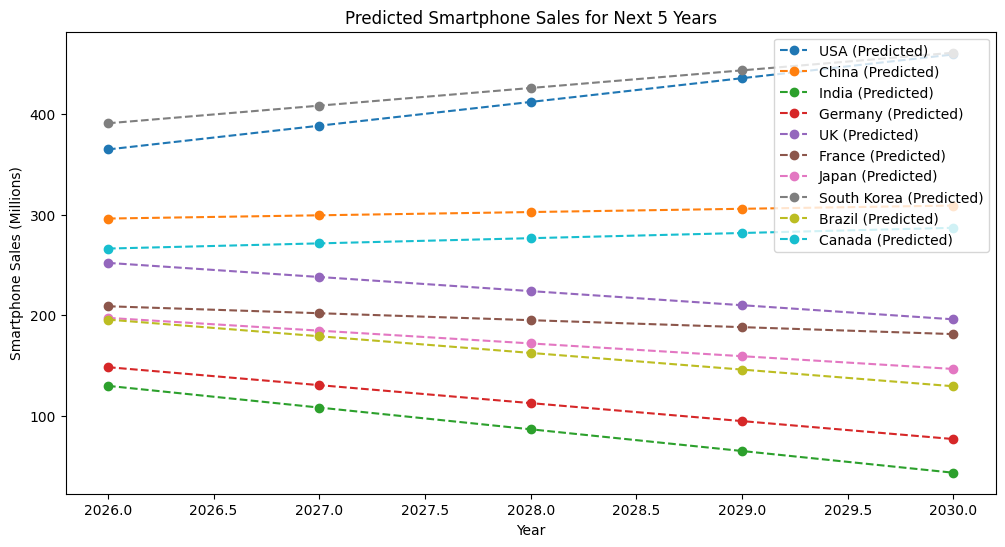

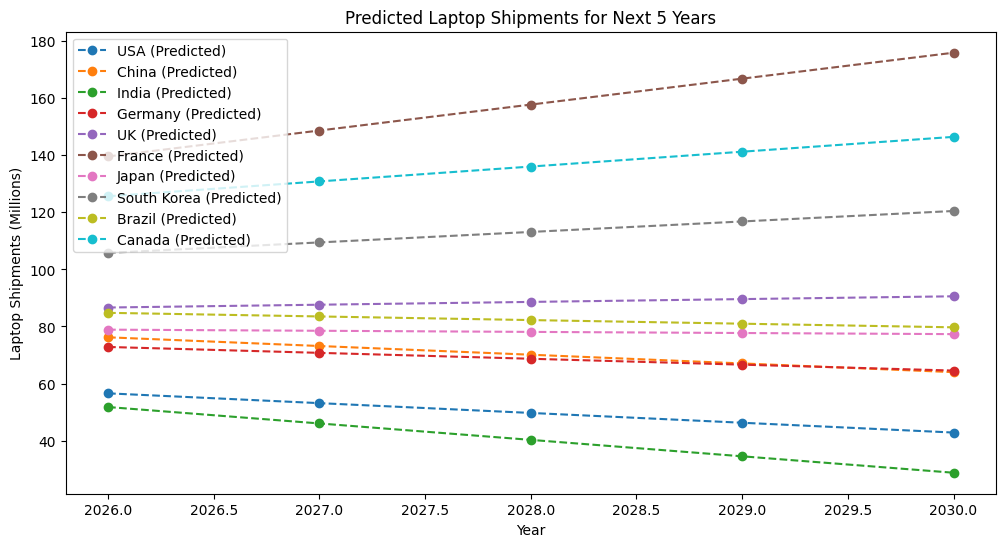

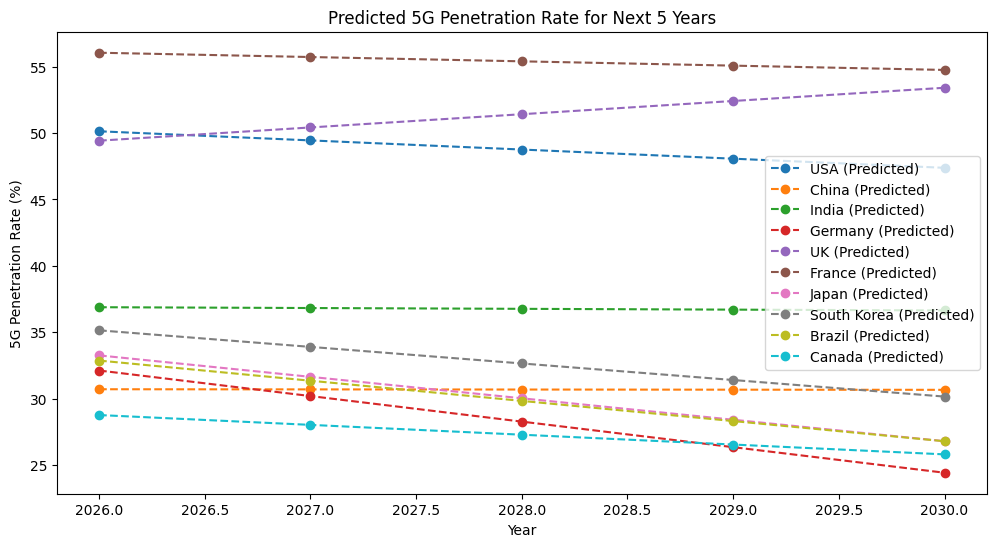

In [9]:
# Visualization of Predictions
def plot_predictions(predictions, feature, ylabel):
    plt.figure(figsize=(12, 6))
    for country, preds in predictions.items():
        plt.plot(future_years, preds, linestyle='--', marker='o', label=f"{country} (Predicted)")
    plt.title(f'Predicted {feature} for Next 5 Years')
    plt.xlabel('Year')
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

plot_predictions(smartphone_preds, 'Smartphone Sales', 'Smartphone Sales (Millions)')
plot_predictions(laptop_preds, 'Laptop Shipments', 'Laptop Shipments (Millions)')
plot_predictions(fiveg_preds, '5G Penetration Rate', '5G Penetration Rate (%)')